In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing import image

In [2]:
#the image is printed in the format of an array
img1=cv2.imread(r'D:\Image Forgery New Datas\Image Forgery New Datas\Original\28.jpg')
print(img1)

[[[139 137 157]
  [141 139 159]
  [143 141 161]
  ...
  [ 60  58  78]
  [ 61  59  79]
  [ 61  59  79]]

 [[138 136 156]
  [140 138 158]
  [142 140 160]
  ...
  [ 63  61  81]
  [ 65  63  83]
  [ 65  63  83]]

 [[136 134 154]
  [139 137 157]
  [141 139 159]
  ...
  [ 61  59  79]
  [ 63  61  81]
  [ 64  62  82]]

 ...

 [[ 13  18  16]
  [ 13  18  16]
  [ 13  18  16]
  ...
  [160 159 175]
  [158 156 176]
  [ 99  97 117]]

 [[ 12  17  15]
  [ 12  17  15]
  [ 12  17  15]
  ...
  [143 142 158]
  [161 159 179]
  [104 102 122]]

 [[ 10  15  13]
  [ 11  16  14]
  [ 11  16  14]
  ...
  [141 140 156]
  [177 175 195]
  [122 120 140]]]


In [3]:
img1.shape

(960, 654, 3)

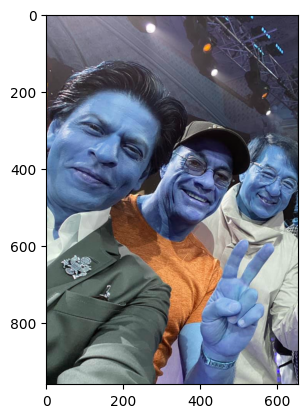

In [4]:
plt.imshow(img1)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers

In [6]:
images_dir = r"D:\Image Forgery New Datas\Image Forgery New Datas"

In [7]:
batch_size = 32
img_height = 500
img_width = 500

In [8]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  images_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 397 files belonging to 2 classes.
Using 318 files for training.


In [9]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  images_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 397 files belonging to 2 classes.
Using 79 files for validation.


In [10]:
class_names = train_ds.class_names
print(class_names)

['Forged', 'Original']


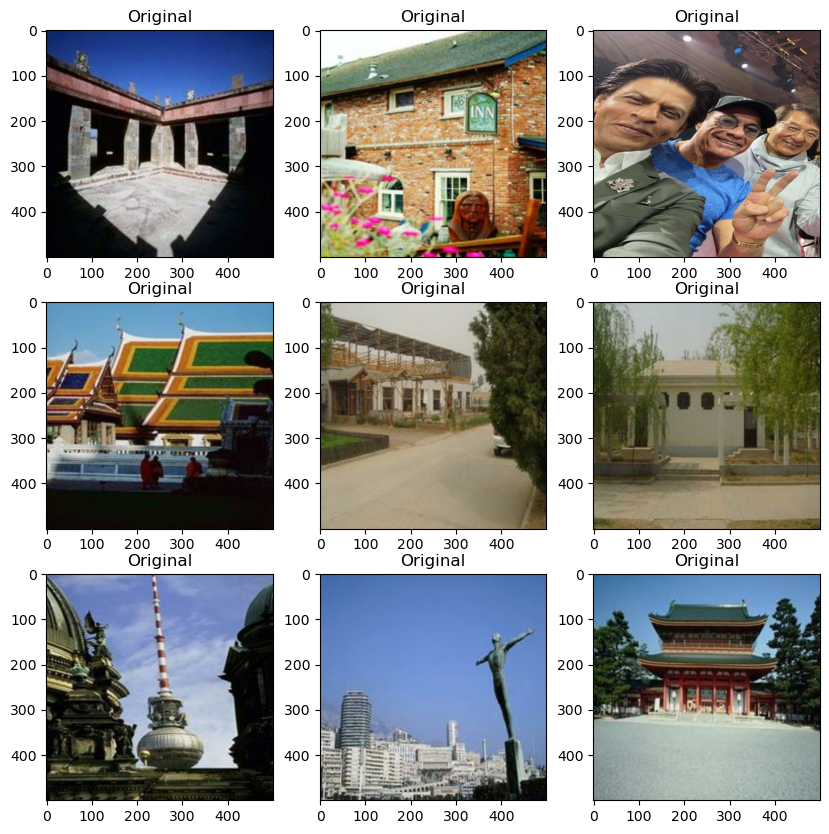

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 500, 500, 3)
(32,)


In [12]:
normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'experimental'

In [16]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

8.309122e-05 0.991587


In [17]:
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(9)
])

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 500, 500, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 500, 500, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 250, 250, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 250, 250, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 125, 125, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      1

In [ ]:
epochs=15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_generator = ImageDataGenerator()
test_data_generator = test_generator.flow_from_directory(
    images_dir, # Put your path here
     target_size=(img_width, img_height),
    batch_size=32,
    shuffle=False)
test_steps_per_epoch = np.math.ceil(test_data_generator.samples / test_data_generator.batch_size)

predictions = model.predict_generator(test_data_generator, steps=test_steps_per_epoch)
# Get most likely class
predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
true_classes = test_data_generator.classes
class_labels = list(test_data_generator.class_indices.keys())

In [ ]:
import sklearn.metrics as metrics
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)  

In [ ]:
from tensorflow.keras.applications import DenseNet121

base_model = DenseNet121(input_shape=(img_height, img_width, 3),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False

model = Sequential([
  base_model,
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.summary()

epochs=5
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(input_shape=(img_height, img_width, 3),
                   include_top=False,
                   weights='imagenet')

base_model.trainable = False

model = Sequential([
  base_model,
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.summary()

epochs=2
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(img_height, img_width, 3),
                      include_top=False,
                      weights='imagenet')

base_model.trainable = False

model = Sequential([
  base_model,
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.summary()

epochs=2
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


In [ ]:
model = Sequential([
  layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(img_height, img_width, 3)),
  layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
  layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
  layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
  layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
  layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
  layers.Flatten(),
  layers.Dense(4096, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(4096, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

model.summary()

epochs=2
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
